<a href="https://colab.research.google.com/github/YashkumarBhatt/Unified-Mentor-Internship/blob/main/Coffe_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project analyzes the coffee sales from a vending machine for 7 months (March-August 2024) to better understand the sales depending on coffee types, monthly variation, price parameter and purchase method i.e., cash/card. Also, Machine Learning is used to taste and track the model to predict future sales. The Python libraries used are Pandas, Numpy, Sklearn, Matplotlib and Seaborn to perform Exploratory Data Analysis.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading and viewing the data
df = pd.read_csv('Coffee_Sales_Analysis.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
# Inspecting the data
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
(1133, 6)


In [ ]:
# Handling missing values
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


We can see there are missing values on card column where the payment type cash is used. This is logical as cash does not have any card number. However, dropping them all will remove all the cash transactions from the data and make it biased. Hence, we will have to impute or fill the null values with some logical data. Here, we have replaced null with 'cash_transection'.

In [ ]:
# Replacing all the null values in card with cash_transection where cash is used for purchase.
df['card'] = df['card'].fillna('cash_transaction')

Now we will convert the date and datetime to proper datatype.

In [ ]:
# Coverting date to 'date' and datetime to 'datetime' datatype from object.
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 53.2+ KB
None


Since there is only one numerical column named price with no significant data variation, there is no need to remove outliers. Hence, we will proceed towards Exploratory Data Analysis to get initial insights of the data. but before, we will split the datetime column and format the data.

In [ ]:
# Extract month, year and time from datetime column and dropping it
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['time'] = df['datetime'].dt.time
df['day_of_week'] = df['date'].dt.day_name()
df['hour']=df['datetime'].dt.strftime('%H')
df.head()

,date,datetime,cash_type,card,money,coffee_name,month,year,time,day_of_week,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,2024,10:15:50.520000,Friday,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,2024,12:19:22.539000,Friday,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,2024,12:20:18.089000,Friday,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,2024,13:46:33.006000,Friday,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,2024,13:48:14.626000,Friday,13


The EDA process will involve analyzing and visualizing the coffee sales over time, type, days of week, revenue, and other relevant parameters.

In [ ]:
# Viewing the split of cash and card buyers in percentage
df['cash_type'].value_counts(normalize=True)*100

,proportion
cash_type,
card,92.144748
cash,7.855252


In [ ]:
# Further splitting the proportion of coffee types
pd.DataFrame(df['coffee_name'].value_counts(normalize=True).sort_values(ascending = False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


In [ ]:
# Overall revenue by products
revenue = (df[['coffee_name', 'money']].groupby('coffee_name', as_index=False).sum().sort_values(by='money', ascending=False))
revenue

,coffee_name,money
7,Latte,9009.14
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
0,Americano,4644.54
6,Hot Chocolate,2778.48
4,Cortado,2745.08
3,Cocoa,1295.94
5,Espresso,1100.62


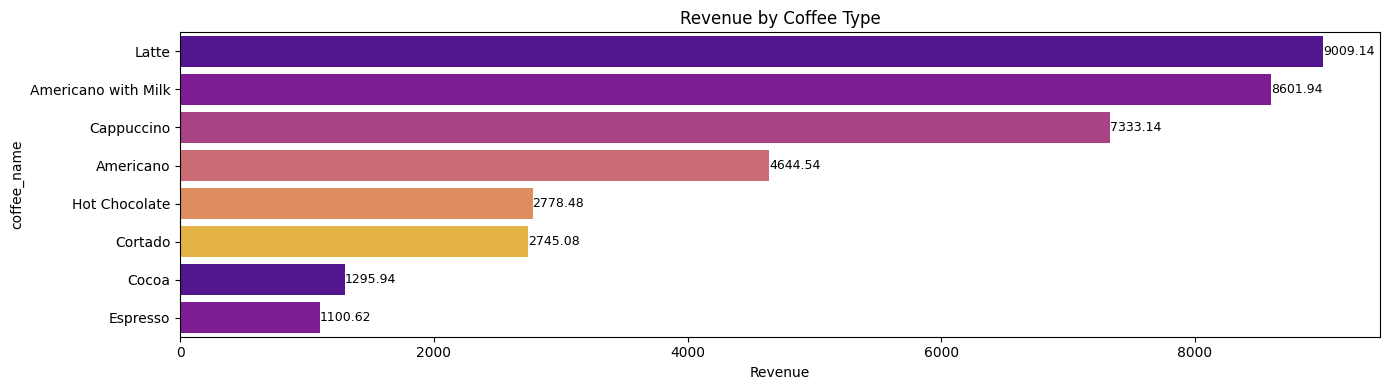

In [ ]:
# Plotting the revenue data
plt.figure(figsize=(14, 4))

ax = sns.barplot(data=revenue,x='money',y='coffee_name',palette=sns.color_palette("plasma", as_cmap=False))

for container in ax.containers:
    ax.bar_label(container, fontsize=9, label_type='edge')

plt.xlabel('Revenue')
plt.title('Revenue by Coffee Type')
plt.tight_layout()
plt.show()

In [ ]:
# Sales by month
monthly_sales = df.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,3,36,34,20,6,30,10,22,48
1,4,35,42,43,6,19,7,13,31
2,5,48,58,55,9,17,8,14,58
3,6,14,69,46,5,19,10,14,50
4,7,36,65,32,9,14,14,11,56


In [ ]:
# Minimum and Maximum values of sales by coffee
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
month,3.0,7.0
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


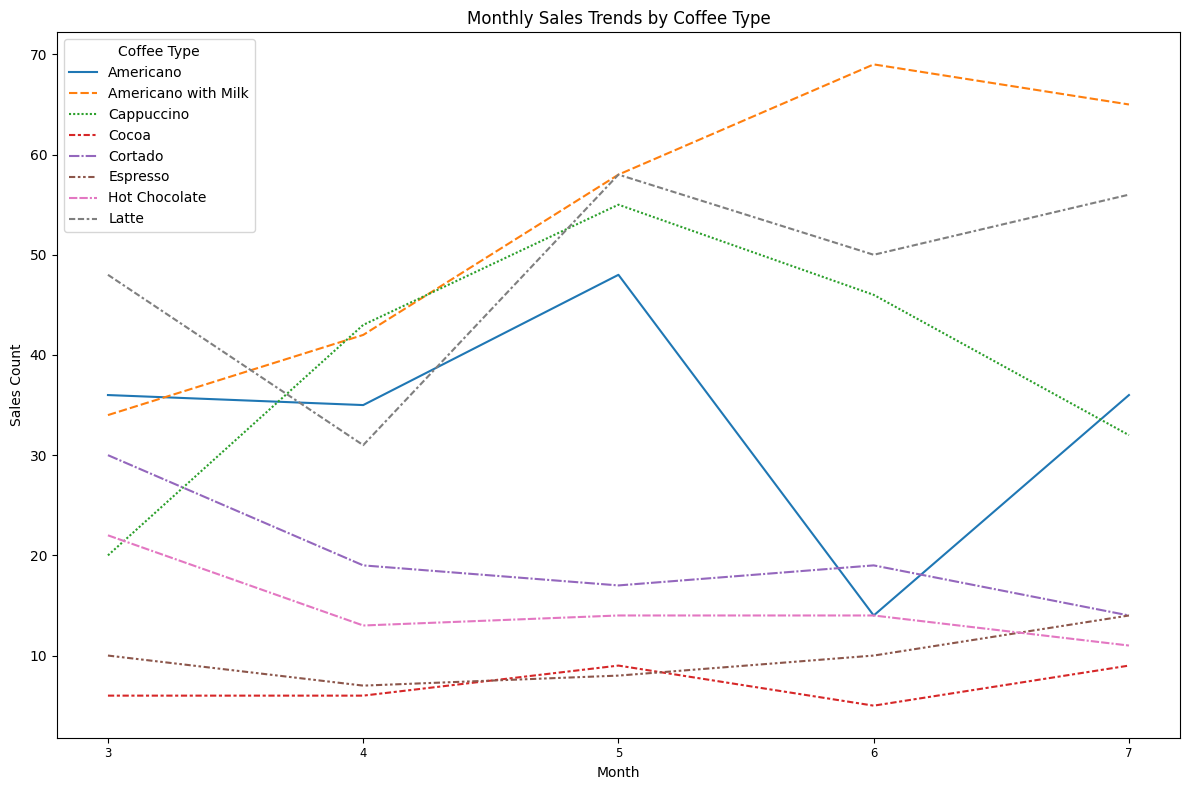

In [ ]:
# Visualising Monthly Sales Trends

plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_sales.drop(columns='month'))
plt.xticks(range(len(monthly_sales['month'])), monthly_sales['month'], size='small')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.legend(loc='upper left', title='Coffee Type')
plt.title('Monthly Sales Trends by Coffee Type')
plt.tight_layout()
plt.show()

In [ ]:
# Weekday Sales
weekday_sales = df.groupby(['day_of_week']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day_of_week,count
0,Friday,163
1,Monday,151
2,Saturday,154
3,Sunday,151
4,Thursday,164
5,Tuesday,185
6,Wednesday,165


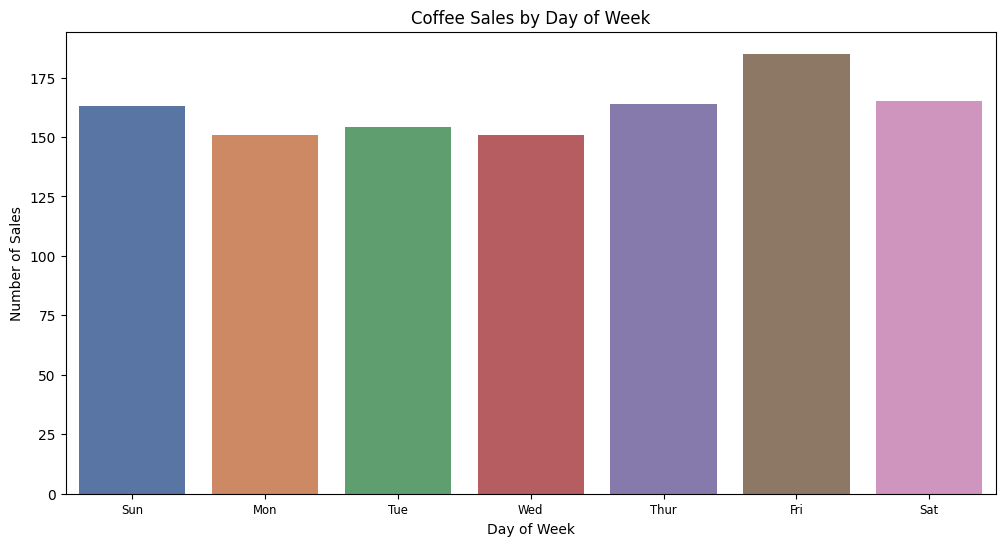

In [ ]:
# Bar chart of weekly sales
plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='day_of_week',y='count', palette = 'deep')
plt.xticks(range(len(weekday_sales['day_of_week'])),['Sun', 'Mon','Tue','Wed','Thur','Fri','Sat'],size='small')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sales')
plt.title('Coffee Sales by Day of Week')
plt.show()

In [ ]:
# Daily Sales distribution
daily_sales = (
    df.groupby(['coffee_name', 'date'])['datetime'].count().reset_index(name='count').pivot(index='date', columns='coffee_name', values='count').reset_index().fillna(0))

daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [ ]:
# Minimum and Maximum Sales
daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.0,5.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,2.0
Cortado,0.0,4.0
Espresso,0.0,4.0
Hot Chocolate,0.0,4.0
Latte,0.0,7.0


In [ ]:
# Hourly Sales
hourly_sales = df.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales

,hour,count
0,07,13
1,08,44
2,09,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


Text(0.5, 1.0, 'Coffee Sales by Hour of Day')

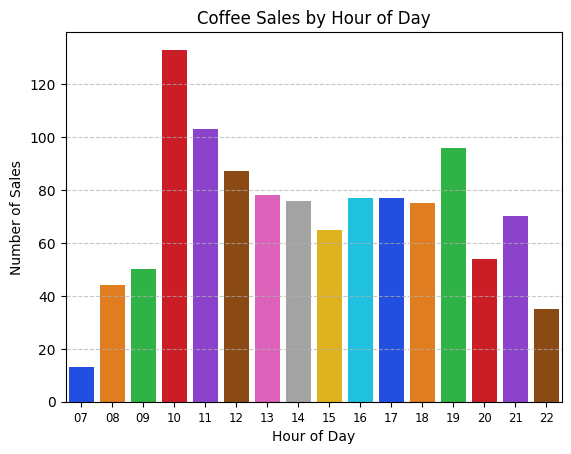

In [ ]:
# Plot of Hourly Sales
sns.barplot(data=hourly_sales,x='hour',y='count',palette='bright')
plt.xticks(range(len(hourly_sales['hour'])),hourly_sales['hour'],size='small')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sales')
plt.title('Coffee Sales by Hour of Day')

In [ ]:
# Hourly Sales by coffee type
hourly_sales_by_coffee = df.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,07,5.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0
1,08,10.0,7.0,8.0,1.0,6.0,0.0,0.0,12.0
2,09,8.0,16.0,6.0,1.0,5.0,3.0,0.0,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
5,12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
6,13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,15.0,8.0,0.0,3.0,4.0,6.0,15.0
9,16,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0


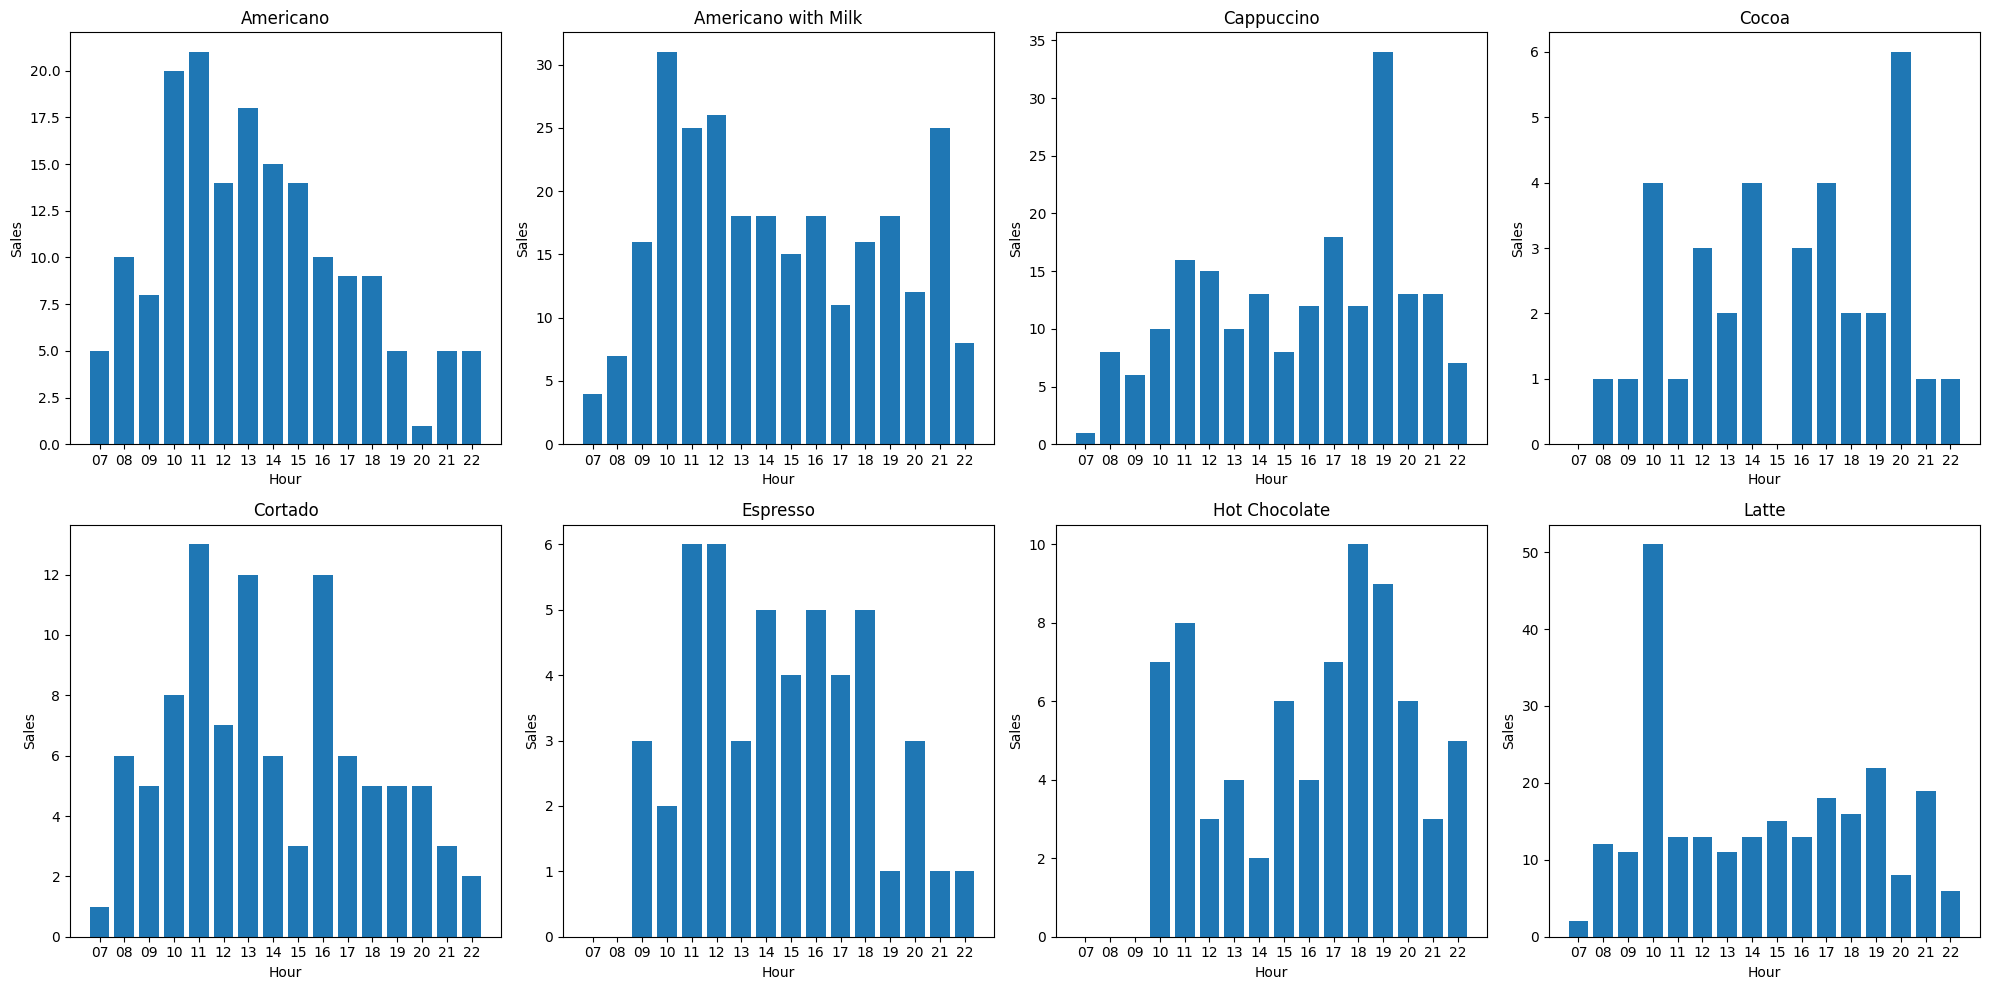

In [ ]:
# Plotting hourly sales by coffee type seperately
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

axs = axs.flatten()

for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):

  axs[i].bar(hourly_sales_by_coffee['hour'],
  hourly_sales_by_coffee[column])
  axs[i].set_title(f'{column}')
  axs[i].set_xlabel('Hour')
  axs[i].set_ylabel('Sales')
plt.tight_layout()
plt.show()

Here ends the EDS part. Now we will deploy machine learning mechanisms to train and test our model. Using sklearn library, we can predict the future sales.

In [ ]:
# Machine Learning Modelling
# Splitting the Data
from sklearn.model_selection import train_test_split

# Defining features and target variable
X = df.drop(columns = ['money', 'date', 'datetime']) # Drop 'date' and 'datetime' columns
y = df['money']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initially we will try simple linear regression since it is easy to interpret as first model but we have more categorical data such as coffee names, card ids etc and it is expected that linear regression will likely mishandle them.

In [ ]:
# Training a dummy model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.3210832947596545
R^2 Score: 0.9290368618743567


In [ ]:
# Model Interpritation
coefficients = pd.DataFrame(model.coef_, X.columns,
columns=['Coefficient'])
print(coefficients)

                           Coefficient
month                    -1.131597e+00
year                      3.774758e-15
cash_type_cash            6.800473e-01
card_ANON-0000-0000-0002 -4.243074e-01
card_ANON-0000-0000-0003 -2.642019e-01
...                                ...
hour_18                   6.805971e-01
hour_19                   1.813728e-01
hour_20                   6.495920e-01
hour_21                   7.702985e-01
hour_22                   2.466856e-02

[1609 rows x 1 columns]


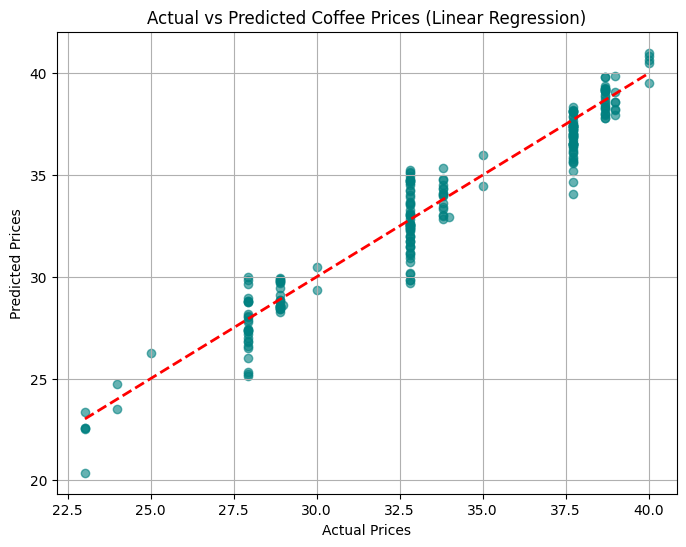

In [ ]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # 45-degree line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Coffee Prices (Linear Regression)')
plt.grid(True)
plt.show()

As predicted earlier, R2 suggests strong fit and low MSE but there is more deviation on the lower prices side indicating a more bias and higher error in this region. Also, the presence of some outliers indicate it handled them poorly. We can further try to deply random forest model which handles the outlier more effectively as well as the catergorical data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f'Random Forest - Mean Squared Error: {rf_mse}')
print(f'Random Forest - R^2 Score: {rf_r2}')


Random Forest - Mean Squared Error: 0.8388292197356727
Random Forest - R^2 Score: 0.9549415589311817


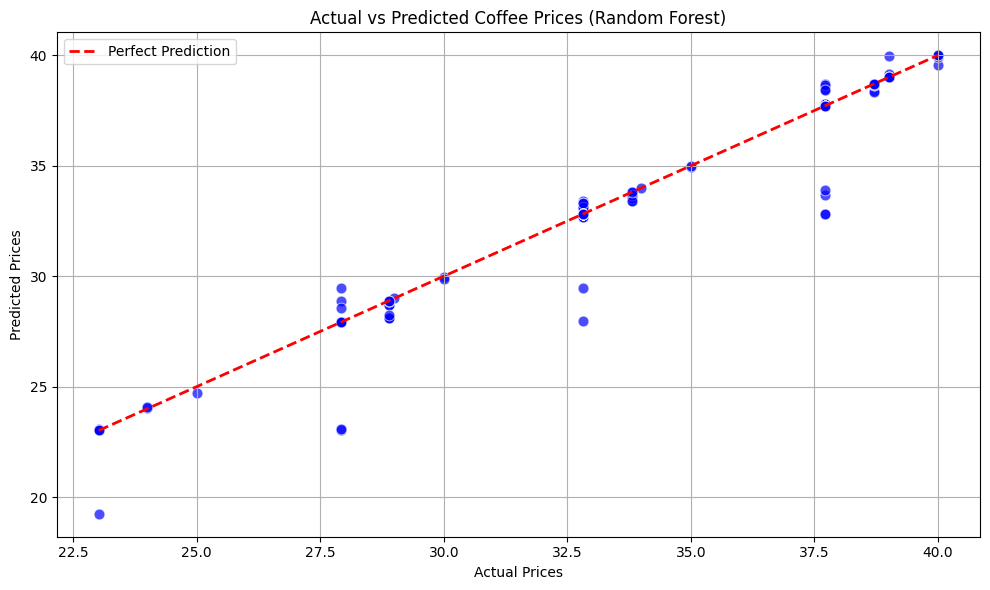

In [ ]:
# Predicting on the test set using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', alpha=0.7, s=60)

# Add a reference line (perfect prediction line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Coffee Prices (Random Forest)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

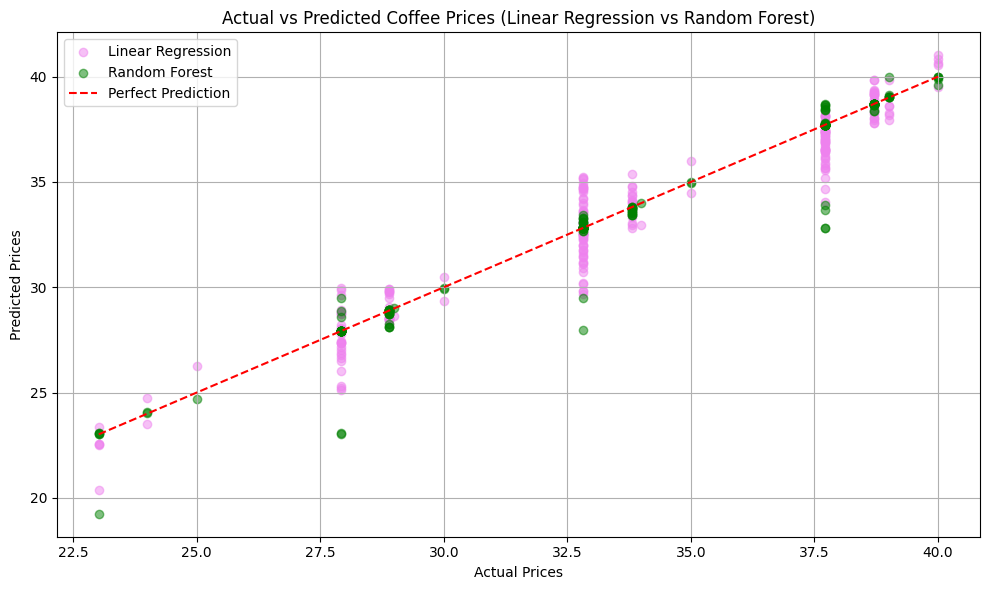

In [ ]:
# Assuming y_test, y_pred_lr (from LinearRegression), y_pred_rf (from RandomForest)
plt.figure(figsize=(10, 6))

# Scatter for Linear Regression
plt.scatter(y_test, y_pred, color='violet', alpha=0.5, label='Linear Regression')

# Scatter for Random Forest
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label='Random Forest')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Coffee Prices (Linear Regression vs Random Forest)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Above graph clearly shows random forest model is superior in predicting the coffee prices with less MSE and better R2 score. Also, note the extent of deviation of linear regression model compared to random forest which is quite higher in the prior. Hence, We can consider Random Forest test as our primary model. Now, we will see the top 5 important features that affect the coffee price prediction.


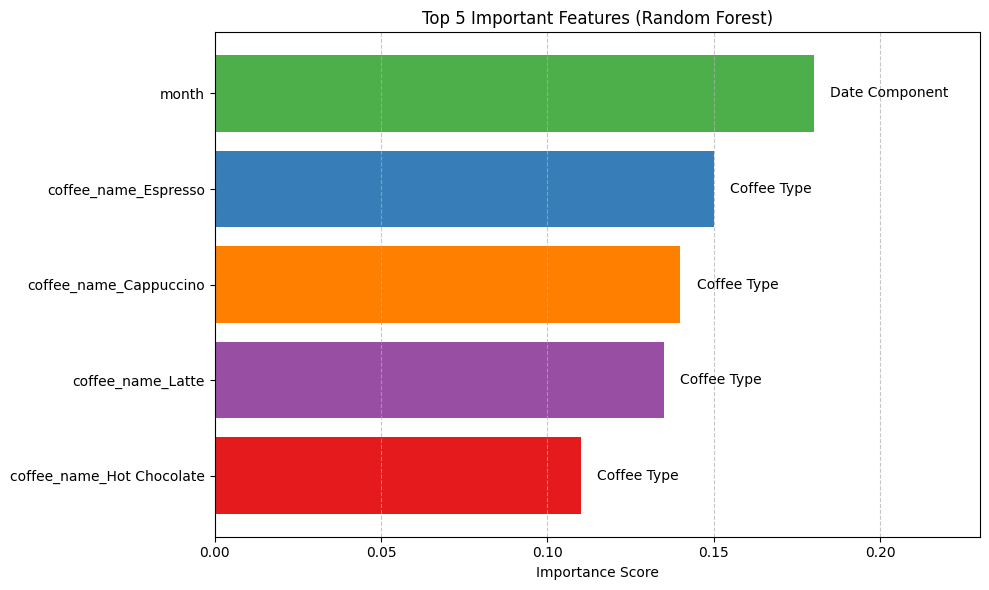

In [ ]:
# Defying features
features = [
    'month',
    'coffee_name_Espresso',
    'coffee_name_Cappuccino',
    'coffee_name_Latte',
    'coffee_name_Hot Chocolate'
]

importances = [0.18, 0.15, 0.14, 0.135, 0.11]

# Map feature to category
category_labels = {
    'month': 'Date Component',
    'coffee_name_Espresso': 'Coffee Type',
    'coffee_name_Cappuccino': 'Coffee Type',
    'coffee_name_Latte': 'Coffee Type',
    'coffee_name_Hot Chocolate': 'Coffee Type'
}

colors = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3', '#e41a1c']
plt.figure(figsize=(10, 6))
bars = plt.barh(features, importances, color=colors)

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.005,
             bar.get_y() + bar.get_height()/2,
             category_labels[features[i]],
             va='center',
             fontsize=10)

plt.xlabel("Importance Score")
plt.xlim(0, max(importances) + 0.05)
plt.title("Top 5 Important Features (Random Forest)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

As seen from the graph, the top 5 features that influence the coffee prices are month and the coffee types viz., Espresso, Cappuccino, Latte and Hot Chocolate. In this way we have deployed ML in predicting the coffee prices with 95% accuracy and very low error 0.83.